## Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
import math
import plotly.express as px
%matplotlib inline

# Data Wrangling

Data wrangling is the process of cleaning, standardizing data to be ready for analysis

In [4]:
df = pd.read_csv('MatchData.csv')

In [5]:
df.head()

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1
3,Down and Out,Weirdo7777,9.0,472014.20,313274.8,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,BlackDpre,13.0,476645.90,316758.4
4,M416,Solayuki1,9.0,473357.80,318340.5,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,1018,Vjolt,13.0,473588.50,318418.8


## Drop unnecessary columns

In [6]:
# drop unnecessary columns in Gun predicting
df.dropna(inplace = True)
df.drop(columns = ['killer_name', 'match_id', 'victim_name'], inplace = True)
df

,killed_by,killer_placement,killer_position_x,killer_position_y,map,time,victim_placement,victim_position_x,victim_position_y
0,Grenade,5.0,657725.10,146275.2,MIRAMAR,823,5.0,657725.10,146275.2
1,SCAR-L,31.0,93091.37,722236.4,MIRAMAR,194,33.0,92238.68,723375.1
2,S686,43.0,366921.40,421623.9,MIRAMAR,103,46.0,367304.50,421216.1
3,Down and Out,9.0,472014.20,313274.8,MIRAMAR,1018,13.0,476645.90,316758.4
4,M416,9.0,473357.80,318340.5,MIRAMAR,1018,13.0,473588.50,318418.8
...,...,...,...,...,...,...,...,...,...
13426342,SCAR-L,3.0,152645.60,315228.9,ERANGEL,629,11.0,152159.30,315392.1
13426344,Down and Out,9.0,298162.80,501961.7,ERANGEL,1086,28.0,299201.80,504790.9
13426345,SCAR-L,20.0,447251.20,628701.7,ERANGEL,327,19.0,447025.30,628270.8
13426346,SCAR-L,3.0,152108.80,315162.6,ERANGEL,624,11.0,152887.40,315209.8


## Drop duplicated values

In [72]:
df.drop_duplicates(inplace = True)

## Missing values

In [94]:
print('Number of missing values: %d' % df.isnull().any(axis = 1).sum())

Number of missing values: 0


**There is no missing value**

## Change the wrong killed_by label

In [63]:
df['killed_by'].value_counts()

M416                   1470887
SCAR-L                 1197918
M16A4                  1182109
AKM                    1090177
UMP9                    703860
S1897                   542399
Mini 14                 391664
Kar98k                  331740
S686                    312487
SKS                     296915
S12K                    285583
Micro UZI               255511
Grenade                 215506
Punch                   207186
Tommy Gun               161881
P1911                   141475
P92                     139915
Hit by Car              107500
Vector                   73612
Bluezone                 52971
Falling                  52039
Groza                    40169
M24                      40038
R1895                    35304
DP-28                    34947
VSS                      31235
AWM                      28789
M249                     27516
Win94                    24998
UAZ                      22623
Crossbow                 19994
Mk14                     16142
P18C    

In [5]:
#Change and drop the wrong gun labels
df[['killed_by']] = df[['killed_by']].replace([
        'death.WeapSawnoff_C', 
        'death.ProjMolotov_DamageField_C', 
        'death.ProjMolotov_C', 
        'death.PG117_A_01_C',
        'Sawnoff',
        'Uaz',
        'Motorbike (SideCar)'
],
    [
        'Sawnoff', 
        'Molotov',
        'Molotov',
        'Boat',
        'Sawed-off',
        'UAZ',
        'Motorbike (Sidecar)'
    ])

indexes = df[(df['killed_by'] == 'death.Buff_FireDOT_C') | (df['killed_by'] == 'death.PlayerMale_A_C')].index
df.drop(indexes, inplace = True)

df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

We cannot know what weapon caused the knock before the 'Down and Out' so I would like to remove row with kill by 'Down and Out'

In [31]:
df.drop(df[df['killed_by'] == 'Down and Out'].index, inplace = True)

## Create phase, killed_by class and distance columns

Ingame phase timeline from this [link](https://pubg.fandom.com/wiki/The_Playzone)

### Phase column

In [37]:
#Create phase column
phase_marker = [0, 720, 1060, 1300, 1480, 1640, 1760, 1880, 1970]
def phase_assign(time):
    for i in range(8, -1, -1):
        if time > phase_marker[i]: return (i + 1)

df['phase'] = list(map(phase_assign, df['time']))

### Weapon class column

In [16]:
#Create class column
weapon_class = {
    'AR': [
        'M416', 'SCAR-L', 'M16A4', 'AKM', 'Groza', 'AUG'
    ],
    
    'SMG': [
        'UMP9', 'Micro UZI', 'Tommy Gun', 'Vector'
    ],
    
    'DMR': [
        'Mini 14', 'SKS', 'VSS', 'Mk14'
    ],
    
    'SR': [
        'Kar98k', 'M24', 'AWM', 'Win94', 'Crossbow'
    ],
    
    'LMG': [
        'M249', 'DP-28'
    ],
    
    'Shotgun': [
        'S1897', 'S686', 'S12K', 'Sawed-off'
    ],
    
    'Handgun': [
        'P1911', 'P92', 'R1895', 'P18C', 'R45'
    ],
    
    'Throwables': [
        'Grenade', 'Molotov'
    ],
    
    'Melee': [
        'Punch', 'Pan', 'Machete', 'Crowbar', 'Sickle'
    ],
    
    'Transport': [
        'Hit by Car', 'UAZ', 'Dacia', 'Motorbike (Sidecar)', 'Motorbike', 'Pickup Truck', 'Buggy', 'Boat', 'Van', 'Aquarail'
    ],
    
    'Zone': [
        'Bluezone', 'RedZone'
    ],
    
    'Others': [
        'Falling', 'Drown' 
    ]
}


In [ ]:
def class_assign(weapon):
    for c in weapon_class:
        if weapon in weapon_class[c]:
            return c
        
df['class'] = list(map(class_assign, df['killed_by']))

### Distance column

In [6]:
def dis_assign(x1, y1, x2, y2):
    return int(math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2))

df['dis'] = list(map(dis_assign, df['killer_x'], df['killer_y'], df['victim_x'], df['victim_y']))

We can see that there are bunch of kill that 

## Standarlize positions

<AxesSubplot:ylabel='Frequency'>

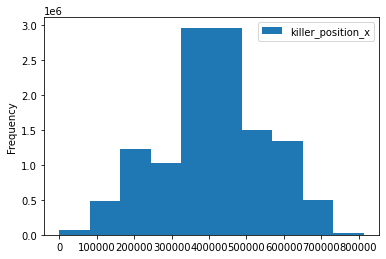

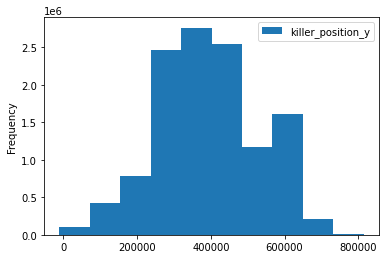

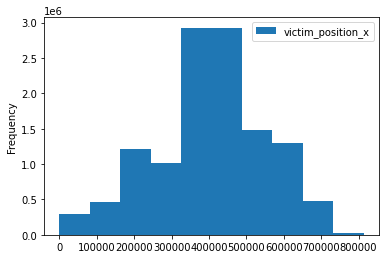

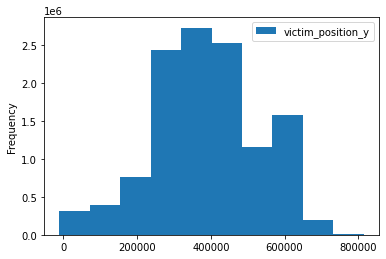

In [10]:
#Standarlize position

#Plot to present the range of position
df[['killer_position_x']].plot(kind = 'hist')
df[['killer_position_y']].plot(kind = 'hist')
df[['victim_position_x']].plot(kind = 'hist')
df[['victim_position_y']].plot(kind = 'hist')

In [11]:
#remove rows with out of range location
indexes = df[(df['killer_position_x'] < 0) | (df['killer_position_x'] > 800000) | 
             (df['killer_position_y'] < 0) | (df['killer_position_y'] > 800000) |
             (df['victim_position_x'] < 0) | (df['victim_position_x'] > 800000) |
             (df['victim_position_y'] < 0) | (df['victim_position_y'] > 800000)].index

df.drop(indexes, inplace = True)

df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

The map dimensions is 8000m x 8000x so we should standarlize the range to between 0 and 8000 for easizer calculation

In [12]:
#Standarlize the range from [0, 800000] to [0, 8000]

df['killer_position_x'] = df['killer_position_x'] / 100
df['killer_position_y'] = df['killer_position_y'] / 100
df['victim_position_x'] = df['victim_position_x'] / 100
df['victim_position_y'] = df['victim_position_y'] / 100

df = df.astype({
    'killer_position_x': int,
    'killer_position_y': int,
    'victim_position_x': int,
    'victim_position_y': int
})

#rename position columns
df.rename(columns = {
    'killer_position_x': 'killer_x',
    'killer_position_y': 'killer_y',
    'victim_position_x': 'victim_x',
    'victim_position_y': 'victim_y'
}, inplace = True)

In [13]:
#rename map
df[['map']] = df[['map']].replace(['MIRAMAR', 'ERANGEL'], ['M', 'R'])

## Other Outliers

In [78]:
df.select_dtypes(include = ['float', 'int64']).keys()

Index(['killer_placement', 'killer_x', 'killer_y', 'time', 'victim_placement',
       'victim_x', 'victim_y', 'phase'],
      dtype='object')

### Killer and victim placement

count    1.209191e+07
mean     1.514353e+01
std      1.510093e+01
min      1.000000e+00
25%      4.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      9.900000e+01
Name: killer_placement, dtype: float64

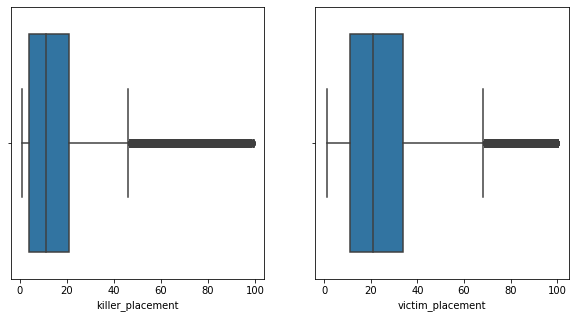

In [88]:
fig, axes = plt.subplots(figsize = (10, 5), ncols = 2)
sns.boxplot(x = 'killer_placement', data = df, ax = axes[0])
sns.boxplot(x = 'victim_placement', data = df, ax = axes[1])


In [91]:
df[['killer_placement', 'victim_placement']].describe().astype(int)

,killer_placement,victim_placement
count,12091908,12091908
mean,15,25
std,15,20
min,1,1
25%,4,11
50%,11,21
75%,21,34
max,99,100


**Note:** It's seem that the killer_placement > 50 are outliers but we all know that the maximum killer_placement is 99, so this column has no outliers

### Time 

<AxesSubplot:xlabel='time'>

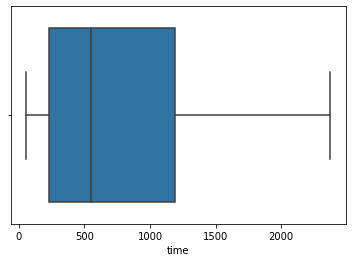

In [95]:
sns.boxplot(x = 'time', data = df)

**There is no time outliers**

### Distance

<AxesSubplot:>

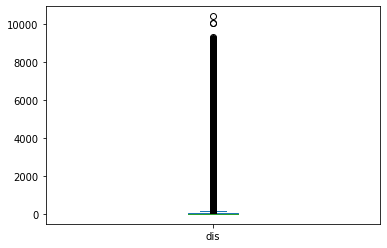

In [10]:
df['dis'].plot(kind = 'box')

C:\Users\thanh\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dis', ylabel='Density'>

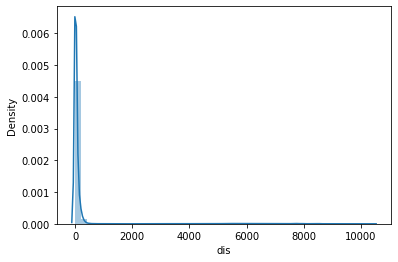

In [9]:
sns.distplot(df['dis'])

The record of the longest kill is still an argument. Although we can find in the internet about a 6766-meter kill, it was confirmed a bug. We can also easily find the longest range of a weapon is 1000m for AWM. After reading articles about the longest kill record and base on the range of weapon, I would like to assume that the limit of kill range is 1200m

In [23]:
df.shape

(12097319, 12)

In [22]:
print('Number of kill over 1200m:', (df['dis'] > 1200).sum())

Number of kill over 1200m: 332129


There are 332129 kills over 1200m, only 2.7% on total kills, so I will just remove these observations

In [24]:
df.drop(df[df['dis'] > 1200].index, inplace = True)

### Distance for each class

<AxesSubplot:xlabel='class', ylabel='dis'>

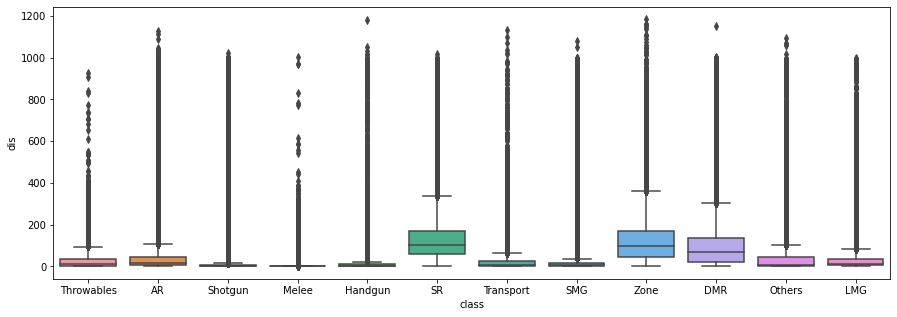

In [18]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'class', y = 'dis', data = df)

Here we can see there are a bunch of outliers at every class: throables, shotgun, melee, handgun and so on. This may happend because of the game bug. We must clean all of these one by one. I did some research of the limit range for each kind of weapon and have the result below

In [9]:
def maxrange(weapon):
    q3 = np.quantile(df[df['class'] == weapon]['dis'], 0.75)
    q1 = np.quantile(df[df['class'] == weapon]['dis'], 0.25)
    iqr = q3 - q1
    maxrange = q3 + 1.5 * iqr
    return maxrange

In [19]:
limit_range = {
    'Throwables': maxrange('Throwables'), 
    'AR': 500,
    'Shotgun': 70,
    'Melee': maxrange('Melee'),
    'Handgun': 300,
    'SR': 1000,
    'Transport': maxrange('Transport'),
    'SMG': 300,
    'Zone': maxrange('Zone'),
    'DMR': 800,
    'Others': maxrange('Others'),
    'LMG': 300
}

for weapon in df['class'].value_counts().keys():
    df.drop(df[(df['class'] == weapon) & (df['dis'] > limit_range[weapon])]['dis'].index, inplace = True)

<AxesSubplot:xlabel='class', ylabel='dis'>

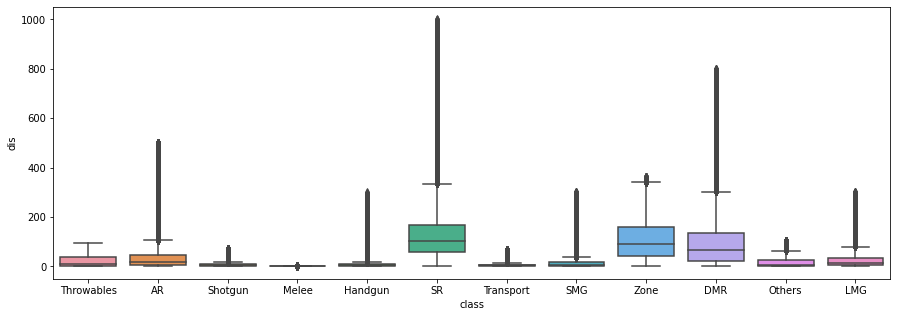

In [20]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = 'class', y = 'dis', data = df)

## Save wrangled dataframe into a new dataset

In [6]:
df.to_csv('MatchData1.csv', index = False)

# Exploratory Data Analysis

In [2]:
df = pd.read_csv('MatchData1.csv')
df.head()

,killed_by,killer_placement,killer_x,killer_y,map,time,victim_placement,victim_x,victim_y,phase,class,dis
0,Grenade,5.0,6577,1462,M,823,5.0,6577,1462,2,Throwables,0
1,SCAR-L,31.0,930,7222,M,194,33.0,922,7233,1,AR,13
2,S686,43.0,3669,4216,M,103,46.0,3673,4212,1,Shotgun,5
3,M416,9.0,4733,3183,M,1018,13.0,4735,3184,2,AR,2
4,AKM,12.0,3763,3178,M,886,15.0,3728,2971,2,AR,209


## Number of death by reasons

In [3]:
def death_by_reason(data, ax, reason):
    img = [plt.imread(('Image/Weapon/' + x + '.png')) for x in data.keys()]
    tick_labels = ax.yaxis.get_ticklabels()

    for i, im in enumerate(img):
        ib = OffsetImage(im, zoom = .18)
        ib.image.axes = ax
        ab = AnnotationBbox(
            ib, 
            tick_labels[i].get_position(),
            frameon = False,
            box_alignment = (1.1, 0.5)
        )
        ax.add_artist(ab)

    for i, x in enumerate(data.values):
        ax.annotate('{:,}'.format(x), xy = (x + data.values[0] * .01, i))

    ax.get_yaxis().set_visible(False)
    ax.set_xlabel('Number of deaths')
    ax.set_title('Number of deaths by ' + reason) 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

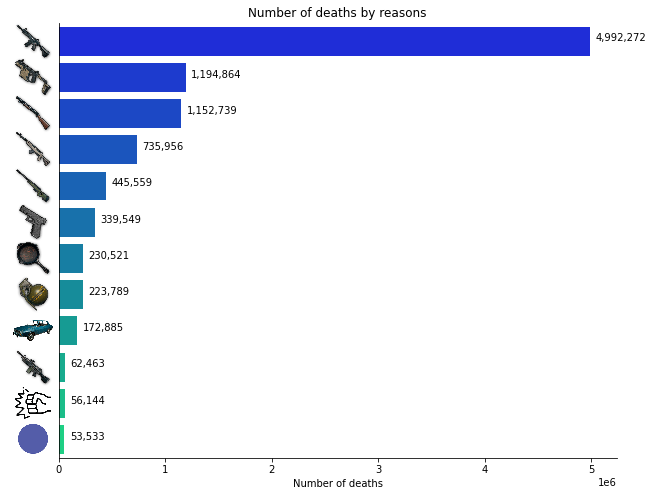

In [71]:
data = df['class'].value_counts()

plt.figure(figsize = (10, 8))
ax = sns.barplot(x = data, y = data.keys(), palette = 'winter')

death_by_reason(data, ax, 'reasons')

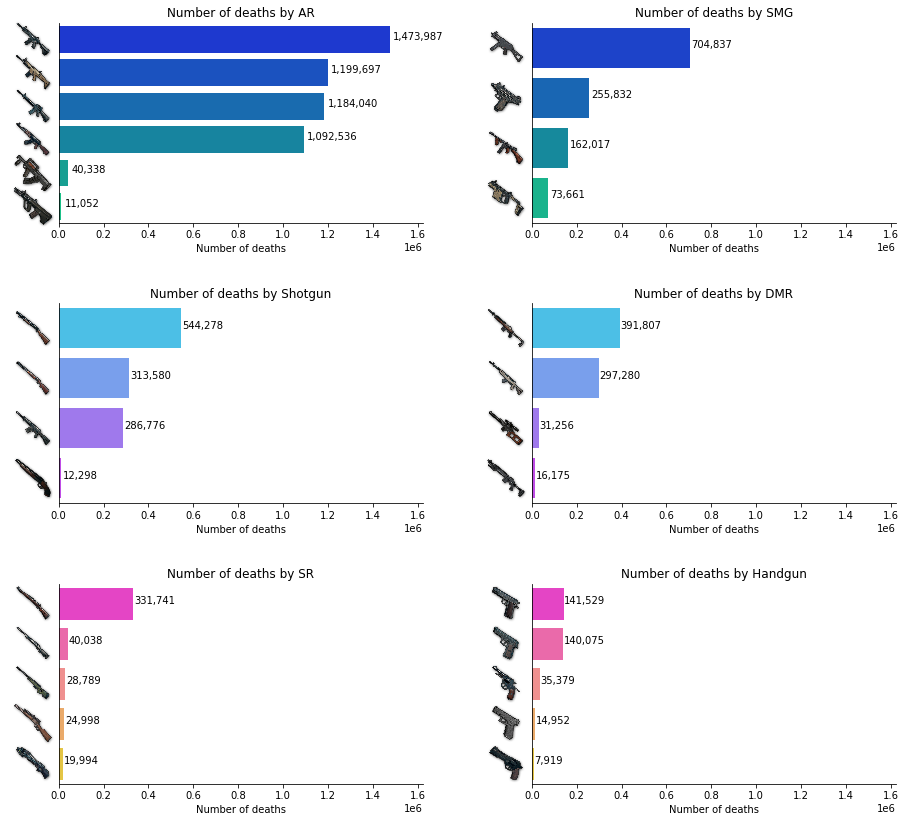

In [7]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 14))
plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
xlim = [0, df[df['class'] == 'AR']['killed_by'].value_counts()['M416'] * 1.1] 

top6weapon = df['class'].value_counts().keys()[0:6]
palette = ['winter', 'cool', 'spring']

for index, weapon in enumerate(top6weapon):
    i = index // 2
    j = index % 2
    data = df[df['class'] == weapon]['killed_by'].value_counts()
    sns.barplot(x = data, y = data.keys(), palette = palette[i], ax = axes[i][j])
    death_by_reason(data, axes[i][j], weapon)
    axes[i][j].set_xlim(xlim)

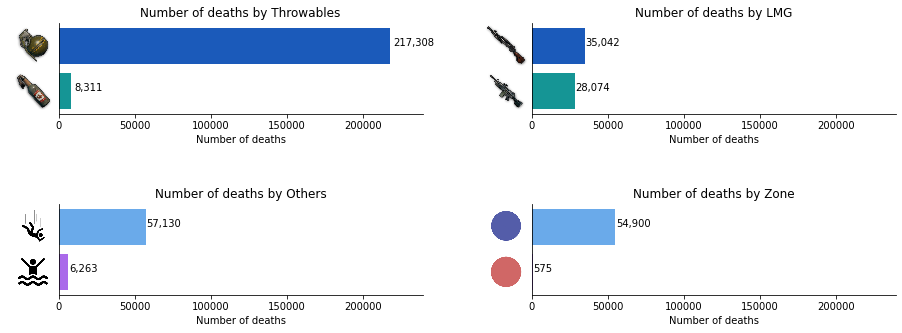

In [8]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15,5))
plt.subplots_adjust(wspace = 0.3, hspace = 1)
xlim = [0, df[df['class'] == 'Throwables']['killed_by'].value_counts()['Grenade'] * 1.1] 

weapons = ['Throwables', 'LMG', 'Others', 'Zone']
palette = ['winter', 'cool']

for index, weapon in enumerate(weapons):
    i = index // 2
    j = index % 2
    data = df[df['class'] == weapon]['killed_by'].value_counts()
    sns.barplot(x = data, y = data.keys(), palette = palette[i], ax = axes[i][j])
    death_by_reason(data, axes[i][j], weapon)
    axes[i][j].set_xlim(xlim)

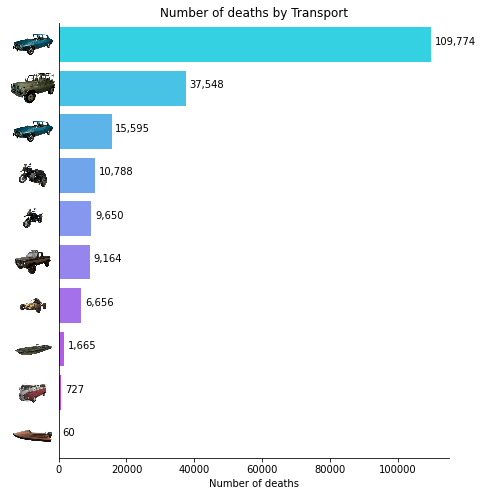

In [9]:
plt.figure(figsize = (7, 8))
data = df[df['class'] == 'Transport']['killed_by'].value_counts()
ax = sns.barplot(x = data, y = data.keys(), palette = 'cool')
death_by_reason(data, ax, 'Transport')

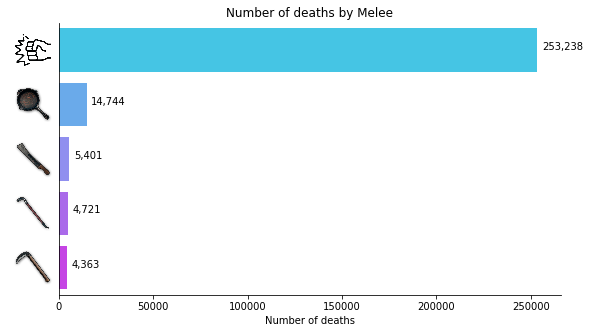

In [10]:
plt.figure(figsize = (9, 5))
data = df[df['class'] == 'Melee']['killed_by'].value_counts()
ax = sns.barplot(x = data, y = data.keys(), palette = 'cool')
death_by_reason(data, ax, 'Melee')

## Gun use by time

In [12]:
def gun_use_by_time(data, ax, weapon):
    img = [plt.imread(('Image/Weapon/' + x + '.png')) for x in data.keys()]
    tick_labels = ax.xaxis.get_ticklabels()

    for i, im in enumerate(img):
        ib = OffsetImage(im, zoom = .18)
        ib.image.axes = ax
        ab = AnnotationBbox(
            ib, 
            tick_labels[i].get_position(),
            frameon = False,
            box_alignment = (0.5, 1.3)
        )
        ax.add_artist(ab) 
        ax.get_xaxis().set_visible(False)
        
    ax.set_title('Death by ' + weapon + ' through matches') 

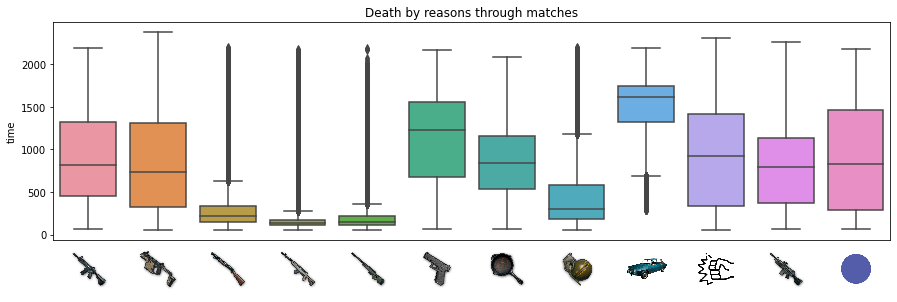

In [16]:
plt.figure(figsize = (15, 4))
ax = sns.boxplot(x = 'class', y = 'time', data = df)
data = df['class'].value_counts()

gun_use_by_time(data, ax, 'reasons')

- Most of the weapons are used at the first half of the match.
- Sniper riffles are used more when it comes to the middle of the match.
- Shotgun, Melee, Handgun are primarily at the beginning.
- Zones kill more players at the second half of the match.

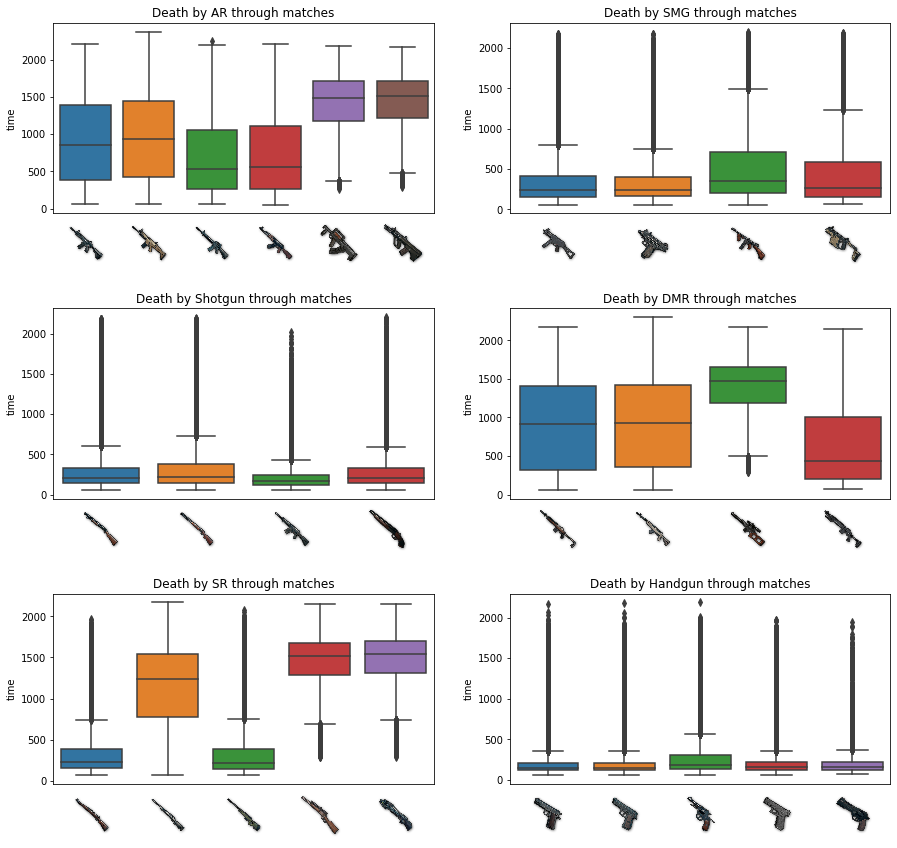

In [14]:
fig, axes = plt.subplots(ncols = 2, nrows = 3, figsize = (15, 14))
plt.subplots_adjust(hspace = 0.5)

weapons = df['class'].value_counts().keys()[0:6]
for index, weapon in enumerate(weapons):
    i = index // 2
    j = index % 2
    sns.boxplot(x = 'killed_by', y = 'time', data = df[df['class'] == weapon], ax = axes[i][j])
    data = df[df['class'] == weapon]['killed_by'].value_counts()
    gun_use_by_time(data, axes[i][j], weapon)

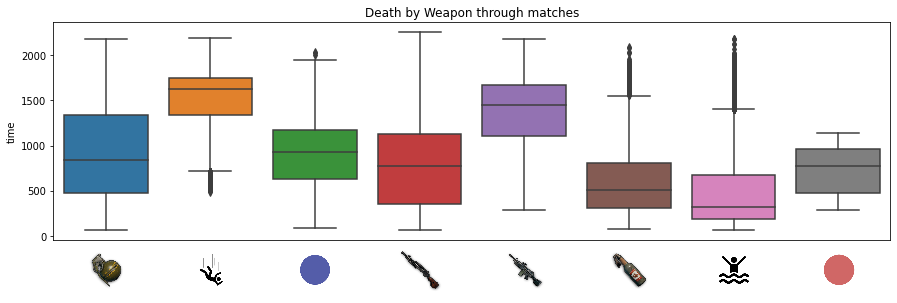

In [15]:
plt.figure(figsize = (15, 4))
plt.subplots_adjust(wspace = 0.3)

weapons = ['Throwables', 'LMG', 'Others', 'Zone']

ax = sns.boxplot(x = 'killed_by', y = 'time', data = df[df['class'].isin(weapons)])
data = df[df['class'].isin(weapons)]['killed_by'].value_counts()
gun_use_by_time(data, ax, 'Weapon')

<Figure size 1080x288 with 0 Axes>

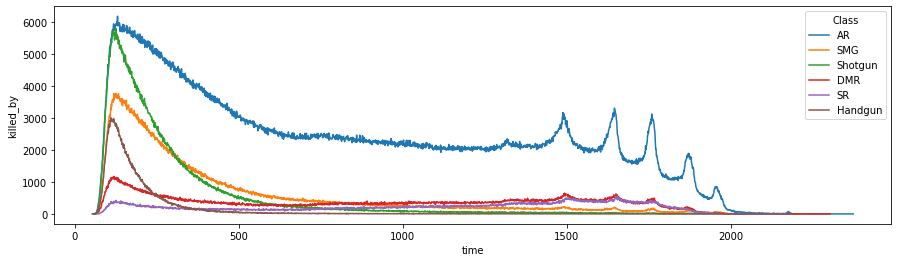

In [40]:
plt.figure(figsize = (15, 4))

plt.figure(figsize = (15, 4))
ax = plt.axes() 

for w in df['class'].value_counts().keys()[0:6]:
    data = df[df['class'] == w][['time', 'killed_by']].groupby('time').count()
    sns.lineplot(x = data.index, y = data['killed_by'], label = w, ax = ax)
    
ax.legend(title = 'Class')

In [21]:
number_of_kill = df.sample(n = 100000).groupby(by = ['victim_x', 'victim_y']).count()['killed_by'].values

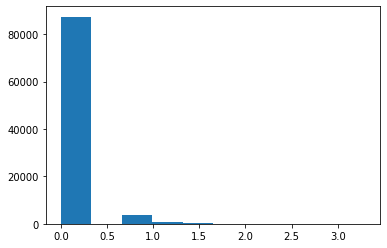

In [22]:
_ = plt.hist(list(map(math.log, number_of_kill)))

In [23]:
df.sample(n = 100000).to_csv('SampleMatchData.csv')